# Histogram of Oriented Gradients

Codes Reference: [plot_hog.ipynb](./ref/plot_hog.ipynb)

In [1]:
import matplotlib.pyplot as plt
import tqdm
from skimage.feature import hog
from skimage import data, exposure
from FDDB_dataloader import FDDB
import PIL.Image as Image
import torchvision.transforms as T
import numpy as np
import torch

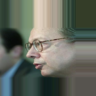

In [10]:
db = FDDB('train_list.npy',crop=False, transform= T.Resize((96,96)))
db[6001][0]

In [3]:
def hog_img_transform(img):
    fd, hog_img = hog(img, 
                  orientations=9, 
                  pixels_per_cell=(16,16,),
                  cells_per_block=(2,2),
                  block_norm = 'L2-Hys',
                  visualize=True, multichannel=True
                 )
    return hog_img

In [4]:
def hog_plot(img, hog_img):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
    ax1.axis('off')
    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.set_title('Input image')
    # Rescale histogram for better display
    hog_img_rescaled = exposure.rescale_intensity(hog_img, in_range=(0, 10))
    ax2.axis('off')
    ax2.imshow(hog_img_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()    

## HOG Visualization

0


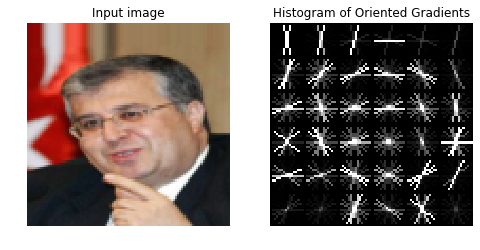

211


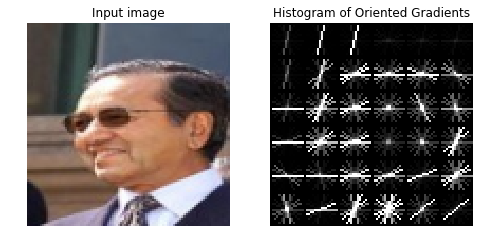

422


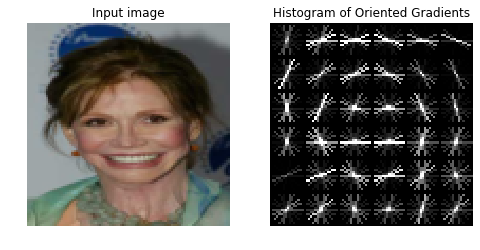

633


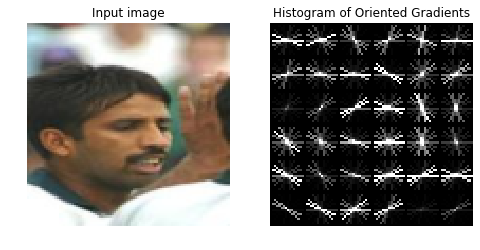

844


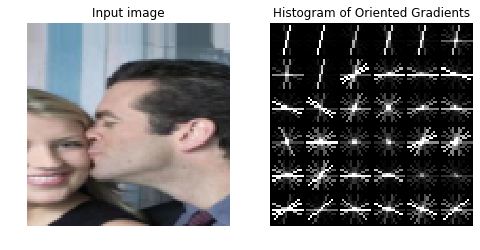

1055


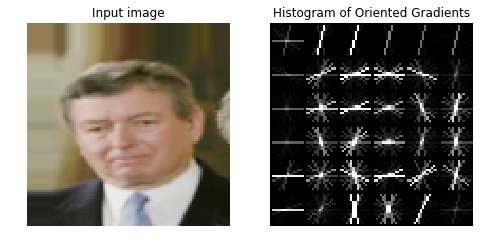

1266


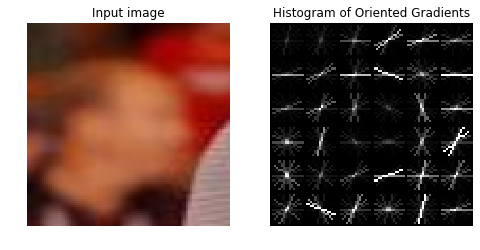

1477


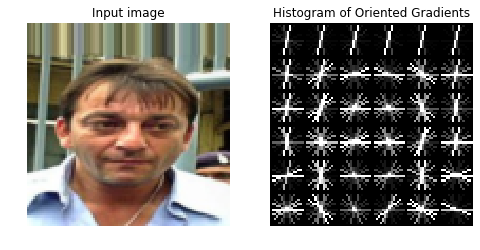

1688


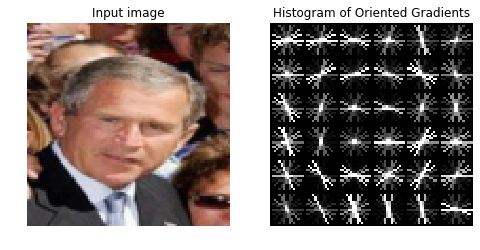

1899


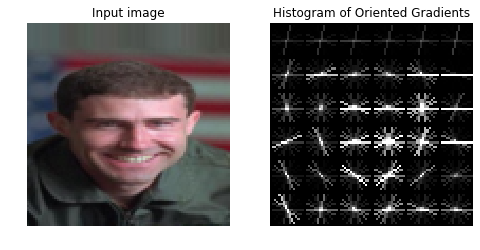

2110


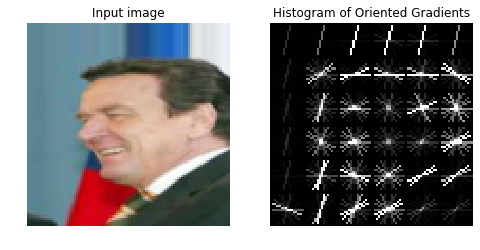

2321


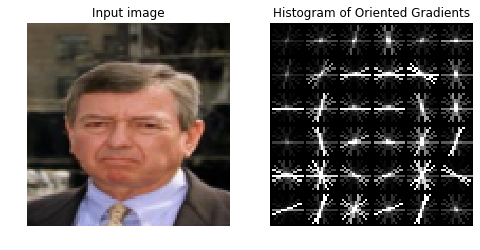

2532


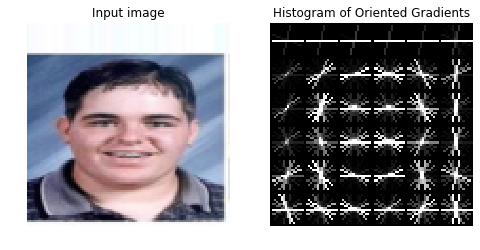

2743


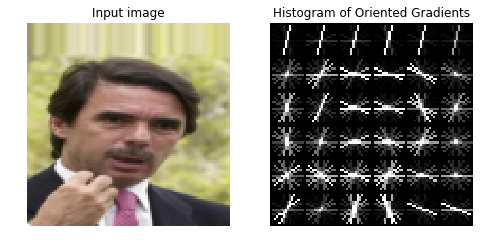

2954


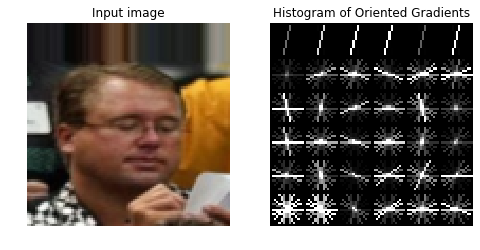

3165


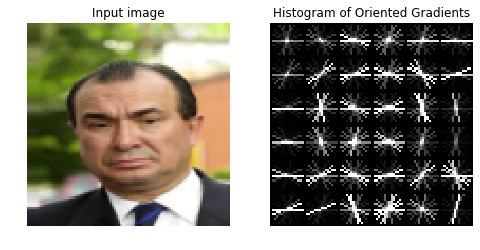

3376


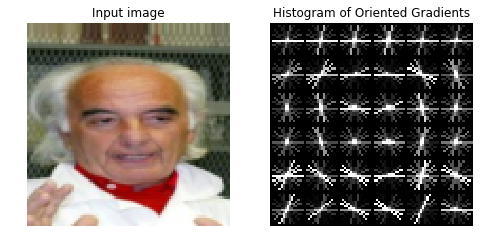

3587


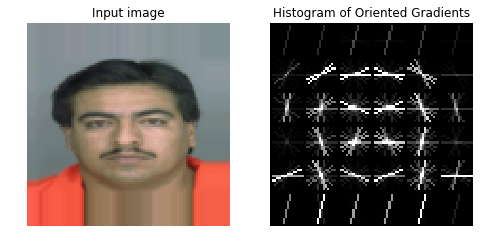

3798


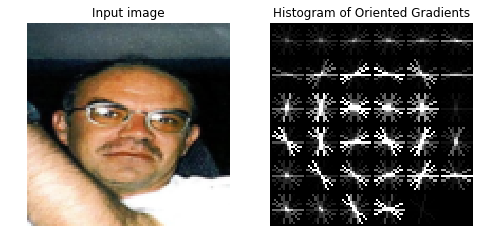

4009


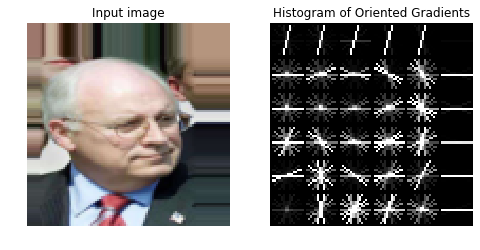

4220


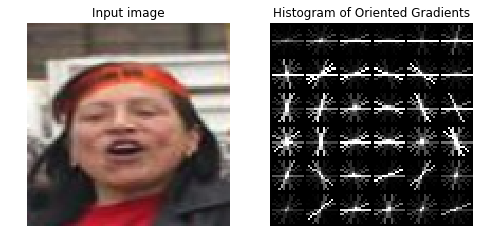

4431


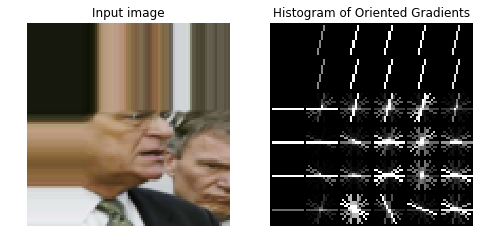

4642


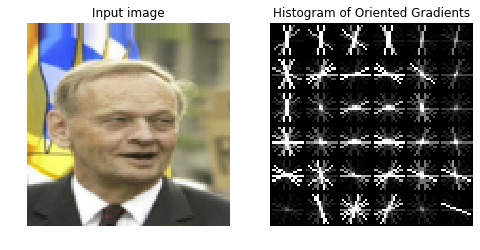

4853


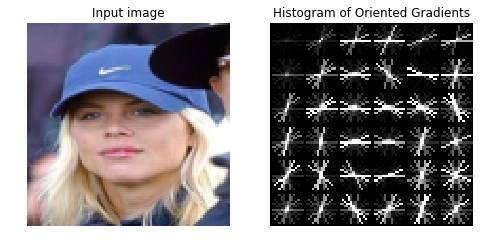

In [12]:
for i in range(0,5000,211):
    print(i)
    img = db[i][0]
    hog_img = hog_img_transform(img)
    hog_plot(img, hog_img)

In [39]:
db.datalist[20]

['faces/2003/01/17/big/img_610_2.jpg', '8']

## Extract Feature For Models

In [16]:
hog_feature = lambda raw: hog(T.Resize((96,96))(raw), 
                  orientations=9, 
                  pixels_per_cell=(16,16,),
                  cells_per_block=(2,2),
                  block_norm = 'L2-Hys',
                  multichannel=True
                 )

In [17]:
db_train = FDDB('train_list.npy',crop=True, transform=hog_feature)
db_val = FDDB('val_list.npy',crop=True, transform=hog_feature)


In [57]:
HOG_train = np.zeros((900, len(db_train)))
label_train = np.zeros(len(db_train), dtype=int)

for i in tqdm.tqdm(range(len(db_train))):
    feature, tar = db_train[i]
    HOG_train[:,i] = feature
    label_train[i] = tar

100%|██████████| 20680/20680 [01:07<00:00, 305.43it/s]


In [18]:
HOG_val = np.zeros((900, len(db_val)))
label_val = np.zeros(len(db_val), dtype=int)

for i in tqdm.tqdm(range(len(db_val))):
    feature, tar = db_val[i]
    HOG_val[:,i] = feature
    label_val[i] = tar

100%|██████████| 5203/5203 [00:30<00:00, 172.64it/s]


In [20]:
torch.save({'hog_feature': HOG_train, 'label': label_train}, 'HOG_train.pt')
torch.save({'hog_feature': HOG_val, 'label': label_val}, 'HOG_val.pt')

In [68]:
zz = torch.load('HOG_train.p')

In [71]:
zz['hog_feature'].shape

(900, 20680)

In [15]:
np.__version__

'1.16.2'

In [19]:
5203 - 1035

4168